## Linear Regression

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.

Now, let's use Linear Regression algorithm to solve our problem statement where we have to predict the "Percentage" scored on the basis of given "Hours" studied.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### Importing data using pandas from given URL

In [22]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported")
data.head()

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Checking missing values in the dataset

In [15]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values present in the data.

#### Visualizing data using matplotlib library to find the relationship between the variables using a scatter plot

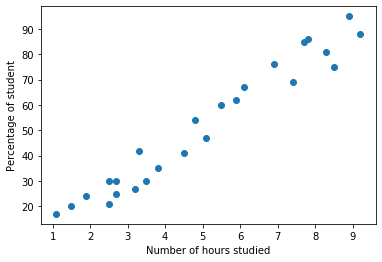

In [31]:
plt.scatter(data["Hours"],data["Scores"])
plt.xlabel("Number of hours studied")
plt.ylabel("Percentage of student")
plt.show()

##### From the above plot we can observe there is a positive correlation between the two variables which means as the number of studying hours increases there is a increase in Percentage scored.

#### Now, we will split the dataset into independent (input) and dependent variable (output) where independent variable would be the "Hours" and dependent variable would be "Percentage" which is to be predicted.

In [25]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values


#### The next step is to split the input and output variables into train and test set to carry out the algorithm. For this, we will import the train_test_split module from sklearn library

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=5)
print("xtrain size:",xtrain.shape)
print("xtest size:",xtest.shape)
print("ytrain size:",ytrain.shape)
print("ytest size:",ytest.shape)

xtrain size: (20, 1)
xtest size: (5, 1)
ytrain size: (20,)
ytest size: (5,)


We can see that out of total 25 samples, 20 are in training dataset and 5 in test dataset

#### Applying Linear Regression algorithm to train our model. For this, we will import Linear Regression librabry from sklearn module.

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(xtrain,ytrain)
print("Model Trained successfully")

Model Trained successfully


Plotting regression line 

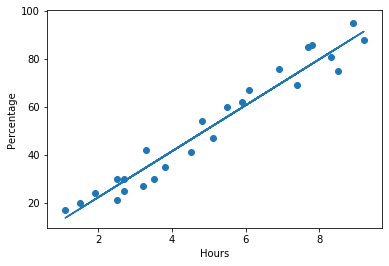

In [44]:
reg_line=lin_reg.intercept_+lin_reg.coef_*x
plt.plot(x,reg_line)
plt.scatter(x,y)
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.show()

#### Prediction for test data

In [45]:
prediction=lin_reg.predict(xtest)

#### Showing actual and predicted results

In [47]:
results=pd.DataFrame({"Hours":xtest.flatten(),"Actual Percent":ytest,"Predicted Percent":prediction})
results

,Hours,Actual Percent,Predicted Percent
0,7.4,69,74.174939
1,6.1,67,61.688457
2,3.2,27,33.833997
3,7.7,85,77.056435
4,4.8,54,49.201975


#### Prediction for given value of hours=9.25


In [51]:
print("Predicted percentage when studying hours=9.25:",lin_reg.predict([[9.25]]))

Predicted percentage when studying hours=9.25: [91.94416405]


#### Final step is to evaluate the model to find how much the predicted values differ from actual values. We will use mean_squared error and root mean_squared error for this.

In [52]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(prediction,ytest))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(prediction,ytest)))

Mean Squared Error: 37.56345257951597
Root Mean Squared Error: 6.1289030486308045


We get an RMSE value of around 6 here.